In [2]:
pyodbc.drivers()

NameError: name 'pyodbc' is not defined

In [1]:
import pyodbc
import pandas as pd  # Import the Pandas library

# Define las credenciales de conexión
server = "sqlplnserver.database.windows.net"
database = "DB_TablesPLN"
username = "sqltfmejm_pln"
password = "tf4jm-d1scurs0s-2504"

# Crea una conexión a la base de datos
connection = pyodbc.connect(
    f"Driver={'ODBC Driver 18 for SQL Server'};Server={server};Database={database};Uid={username};Pwd={password};TrustServerCertificate=yes"
)

# Realiza la consulta SQL
cursor = connection.cursor()
cursor.execute(
    """
SELECT TOP (3000) 
       [nombre_discurso]
      ,[topico]
      ,[palabras]
      ,[porcentajes]
  FROM [dbo].[distribucion_palabras_topicos_tidy]
"""
)
# Crea una lista con los títulos de las columnas
columnas = ["nombre_discurso", "topico", "palabras", "porcentajes"]
# Obtén los resultados de la consulta como listas
rows = [columnas] + [list(row) for row in cursor.fetchall()]

# Crea un dataframe con los resultados de la consulta
df = pd.DataFrame(rows, columns=columnas)

# # Define la primera fila como los títulos de las columnas
df.columns = df.iloc[0]

# # Elimina la primera fila
df = df.iloc[1:]

# Cierra la conexión
connection.close()

# Imprime el dataframe
print(df)

0                      nombre_discurso     topico   palabras porcentajes
1     Argentina_2022_Alberto_Fernandez   Topico_1        veo    0.027539
2     Argentina_2022_Alberto_Fernandez   Topico_1  educación    0.027471
3     Argentina_2022_Alberto_Fernandez   Topico_1      hablo    0.016749
4     Argentina_2022_Alberto_Fernandez   Topico_1     países    0.016731
5     Argentina_2022_Alberto_Fernandez   Topico_1        día    0.011356
...                                ...        ...        ...         ...
2796           Peru_2023_Dina_Boluarte  Topico_10      parte    0.002985
2797           Peru_2023_Dina_Boluarte  Topico_10   millones    0.002887
2798           Peru_2023_Dina_Boluarte  Topico_10      junio    0.002782
2799           Peru_2023_Dina_Boluarte  Topico_10       perú    0.002681
2800           Peru_2023_Dina_Boluarte  Topico_10     avance    0.002674

[2800 rows x 4 columns]


In [2]:
import seaborn as sns
import pandas as pd

# Obtiene el tipo de variable de cada columna
tipos_variables = df.dtypes

# Imprime el tipo de variable de cada columna
for columna, tipo_variable in tipos_variables.items():
    print(f"Columna: {columna}, Tipo de variable: {tipo_variable}")

Columna: nombre_discurso, Tipo de variable: object
Columna: topico, Tipo de variable: object
Columna: palabras, Tipo de variable: object
Columna: porcentajes, Tipo de variable: object


In [3]:
# Estadísticas descriptivas
df.head()

,nombre_discurso,topico,palabras,porcentajes
1,Argentina_2022_Alberto_Fernandez,Topico_1,veo,0.027539
2,Argentina_2022_Alberto_Fernandez,Topico_1,educación,0.027471
3,Argentina_2022_Alberto_Fernandez,Topico_1,hablo,0.016749
4,Argentina_2022_Alberto_Fernandez,Topico_1,países,0.016731
5,Argentina_2022_Alberto_Fernandez,Topico_1,día,0.011356


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 1 to 2800
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nombre_discurso  2800 non-null   object
 1   topico           2800 non-null   object
 2   palabras         2800 non-null   object
 3   porcentajes      2800 non-null   object
dtypes: object(4)
memory usage: 87.6+ KB


In [5]:
# esta es para toda la union de tabla
df["porcentajes"] = pd.to_numeric(df["porcentajes"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 1 to 2800
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nombre_discurso  2800 non-null   object 
 1   topico           2800 non-null   object 
 2   palabras         2800 non-null   object 
 3   porcentajes      2800 non-null   float64
dtypes: float64(1), object(3)
memory usage: 87.6+ KB


In [6]:
df.describe()

,porcentajes
count,2800.000000
mean,0.005720
std,0.004034
min,0.000575
25%,0.003621
50%,0.004831
75%,0.007160
max,0.046279


In [7]:
df.shape

(2800, 4)

In [8]:
df.columns.values

array(['nombre_discurso', 'topico', 'palabras', 'porcentajes'],
      dtype=object)

In [9]:
# Obtiene los valores únicos de la columna "nombre"
valores_unicos = df["topico"].unique()

# Imprime los valores únicos
print(valores_unicos)

df2 = df

['Topico_1' 'Topico_2' 'Topico_3' 'Topico_4' 'Topico_5' 'Topico_6'
 'Topico_7' 'Topico_8' 'Topico_9' 'Topico_10']


In [10]:
import category_encoders as ce
import pandas as pd

# Selecciona las columnas deseadas de df2
df2_seleccion = df2[["topico", "palabras", "nombre_discurso"]]
df2_seleccion.head()

,topico,palabras,nombre_discurso
1,Topico_1,veo,Argentina_2022_Alberto_Fernandez
2,Topico_1,educación,Argentina_2022_Alberto_Fernandez
3,Topico_1,hablo,Argentina_2022_Alberto_Fernandez
4,Topico_1,países,Argentina_2022_Alberto_Fernandez
5,Topico_1,día,Argentina_2022_Alberto_Fernandez


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in ["topico", "palabras", "nombre_discurso"]:
    df2_seleccion[col] = encoder.fit_transform(df2_seleccion[col])

df2["topico_codificado"] = df2_seleccion["topico"]
df2["palabras_codificado"] = df2_seleccion["palabras"]
df2["nombre_discurso_codificado"] = df2_seleccion["nombre_discurso"]
df2_seleccion.head()

df2 = pd.concat([df2, df2_seleccion], axis=1)

df2.head()

C:\Users\linkl\AppData\Local\Temp\ipykernel_4648\2713560827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_seleccion[col] = encoder.fit_transform(df2_seleccion[col])
C:\Users\linkl\AppData\Local\Temp\ipykernel_4648\2713560827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_seleccion[col] = encoder.fit_transform(df2_seleccion[col])
C:\Users\linkl\AppData\Local\Temp\ipykernel_4648\2713560827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,nombre_discurso,topico,palabras,porcentajes,topico_codificado,palabras_codificado,nombre_discurso_codificado,topico,palabras,nombre_discurso
1,Argentina_2022_Alberto_Fernandez,Topico_1,veo,0.027539,0,764,0,0,764,0
2,Argentina_2022_Alberto_Fernandez,Topico_1,educación,0.027471,0,250,0,0,250,0
3,Argentina_2022_Alberto_Fernandez,Topico_1,hablo,0.016749,0,338,0,0,338,0
4,Argentina_2022_Alberto_Fernandez,Topico_1,países,0.016731,0,532,0,0,532,0
5,Argentina_2022_Alberto_Fernandez,Topico_1,día,0.011356,0,242,0,0,242,0


In [12]:
df2.loc[:, df2.dtypes == "object"] = df2.select_dtypes(["object"]).apply(
    lambda x: x.astype("category")
)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 1 to 2800
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   nombre_discurso             2800 non-null   category
 1   topico                      2800 non-null   category
 2   palabras                    2800 non-null   category
 3   porcentajes                 2800 non-null   float64 
 4   topico_codificado           2800 non-null   int32   
 5   palabras_codificado         2800 non-null   int32   
 6   nombre_discurso_codificado  2800 non-null   int32   
 7   topico                      2800 non-null   int32   
 8   palabras                    2800 non-null   int32   
 9   nombre_discurso             2800 non-null   int32   
dtypes: category(3), float64(1), int32(6)
memory usage: 138.1 KB


In [13]:
data2 = df2
data2 = data2.drop(columns=["topico", "palabras", "nombre_discurso"], errors="ignore")
data2.head()

,porcentajes,topico_codificado,palabras_codificado,nombre_discurso_codificado
1,0.027539,0,764,0
2,0.027471,0,250,0
3,0.016749,0,338,0
4,0.016731,0,532,0
5,0.011356,0,242,0


In [14]:
data2.shape

(2800, 4)

In [15]:
""" is any missing values across columns"""
data2.isnull().any()

0
porcentajes                   False
topico_codificado             False
palabras_codificado           False
nombre_discurso_codificado    False
dtype: bool

In [16]:
""" count of missing values of the entire dataframe"""
data2.isnull().sum().sum()

0

In [17]:
data2.isnull().sum()

0
porcentajes                   0
topico_codificado             0
palabras_codificado           0
nombre_discurso_codificado    0
dtype: int64

In [18]:
import pandas as pd


total = data2.isnull().sum().sort_values(ascending=False)

percent_1 = data2.isnull().sum() / data2.isnull().count() * 100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=["Total", "%"])
missing_data

,Total,%
0,,
porcentajes,0,0.0
topico_codificado,0,0.0
palabras_codificado,0,0.0
nombre_discurso_codificado,0,0.0


In [19]:
data2.describe()

,porcentajes,topico_codificado,palabras_codificado,nombre_discurso_codificado
count,2800.000000,2800.000000,2800.000000,2800.000000
mean,0.005720,4.500000,421.809286,6.500000
std,0.004034,2.872794,222.761455,4.031849
min,0.000575,0.000000,0.000000,0.000000
25%,0.003621,2.000000,236.000000,3.000000
50%,0.004831,4.500000,471.000000,6.500000
75%,0.007160,7.000000,598.000000,10.000000
max,0.046279,9.000000,789.000000,13.000000


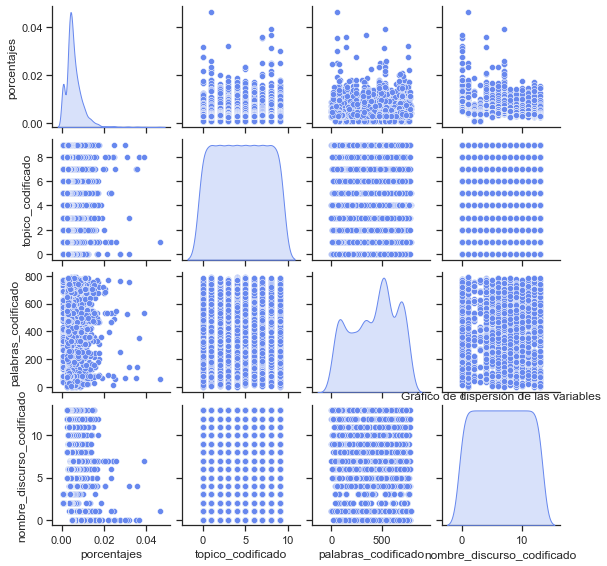

In [21]:
import matplotlib.pyplot as plt


# Establecer el estilo y los colores

sns.set(style="ticks", palette="coolwarm")


# Generar el gráfico pairplot

sns.pairplot(data2, height=2, diag_kind="kde", palette="coolwarm")


# Personalizar las etiquetas de los ejes

plt.xlabel("Variable X")

plt.ylabel("Variable Y")


# Añadir un título al gráfico

plt.title("Gráfico de dispersión de las variables")


# Mostrar el gráfico

plt.show()

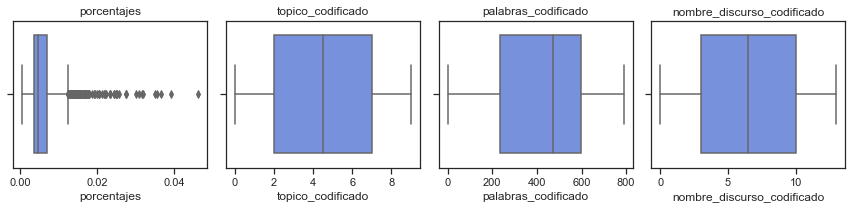

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Establece el tamaño del gráfico

# Selecciona las columnas relevantes (excluyendo "quality")
columns = [
    "porcentajes",
    "topico_codificado",
    "palabras_codificado",
    "nombre_discurso_codificado",
]
color_palette = sns.color_palette(
    "coolwarm"
)  # Ajustar el brillo de la paleta de colores

# Genera los gráficos de cajas para las columnas seleccionadas
for i, col in enumerate(columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=data2[col])
    plt.title(col)
plt.tight_layout()  # Ajusta el espaciado entre los gráficos
plt.show()  # Muestra los gráficos de cajas

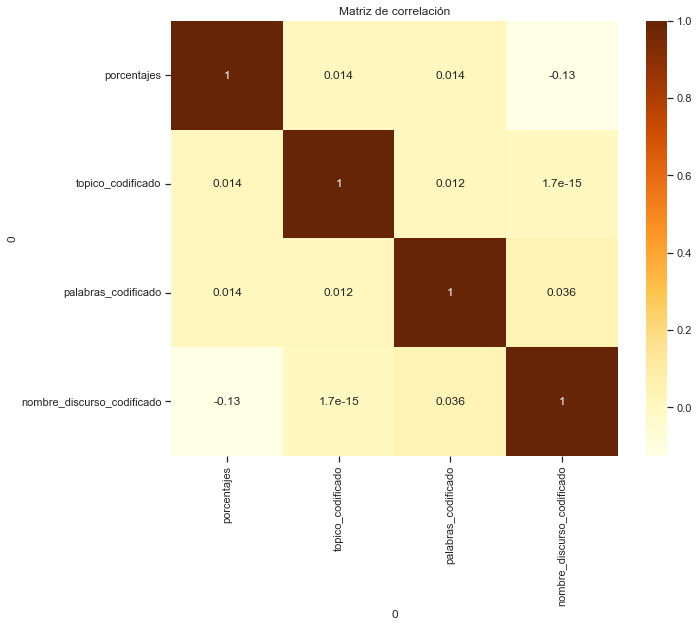

In [24]:
correlation_matrix = data2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr")
plt.title("Matriz de correlación")
plt.show()